# Worked Examples: Grid Search Method

These worked solutions correspond to the exercises on the [Grid Search Method](../..//geometry_optimisation/grid_search_method.ipynb) page.

**How to use this notebook:**
- Try each exercise yourself first before looking at the solution
- The code cells show both the code and its output
- Download this notebook if you want to run and experiment with the code yourself
- Your solution might look different - that's fine as long as it gives the correct answer!

## Exercise: Grid Search for Harmonic Potential Minimum

**Problem:** Implement a grid search to find the minimum of the harmonic potential energy surface. The grid search method evaluates the function at many points and identifies the point with the lowest value.

We'll use the same harmonic potential from the previous exercise:

$$U(r) = \frac{k}{2}(r-r_0)^2$$

with $k = 36.0$ eV Å<sup>−2</sup> and $r_0 = 0.74$ Å, searching over the range $0.38 \leq r \leq 1.1$ Å.

**Solution:**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

def harmonic_potential(r, k, r_0):
    """Calculate the harmonic potential energy.
    
    Args:
        r (float): Bond length (Å). Can be a float or np.ndarray.
        k (float): Force constant (eV Å⁻^2).
        r_0 (float): Equilibrium bond length (Å).
    
    Returns:
        Potential energy (eV). Type matches input r.
    """
    return 0.5 * k * (r - r_0) ** 2

# Define parameters for H₂
k = 36.0  # eV Å^2
r_0 = 0.74  # Å

# Create grid of r values
r_grid = np.linspace(0.38, 1.1, 20)

# Calculate potential energy at all grid points
U_grid = harmonic_potential(r_grid, k, r_0)

# Find the index of the minimum value
min_index = np.argmin(U_grid)

# Extract the minimum position and energy
r_min = r_grid[min_index]
U_min = U_grid[min_index]

print(f"Grid search results:")
print(f"  Minimum found at r = {r_min:.4f} Å")
print(f"  Potential energy at minimum: U = {U_min:.6f} eV")
print(f"  Analytical solution: r₀ = {r_0} Å")
print(f"  Error: {abs(r_min - r_0):.4f} Å")

Grid search results:
  Minimum found at r = 0.7211 Å
  Potential energy at minimum: U = 0.006462 eV
  Analytical solution: r₀ = 0.74 Å
  Error: 0.0189 Å


**Explanation:**

The grid search found a minimum at approximately $r = 0.7211$ Å, which is close to the analytical solution of $r_0 = 0.74$ Å. The discrepancy arises because:

1. **Grid spacing limitation**: With 20 points over the range $0.38$ to $1.1$ Å, our grid spacing is:
   $$\Delta r = \frac{1.1 - 0.38}{19} \approx 0.0248 \text{ Å}$$
   
2. **Discrete sampling**: The grid search can only find minima at grid points. If the true minimum falls between two grid points, the method will report the nearest grid point.

Key aspects of the implementation:
- `np.linspace(0.38, 1.1, 20)` creates 20 evenly spaced points
- `np.argmin(U_grid)` returns the **index** of the minimum value, not the value itself
- We use this index to extract both the position (`r_grid[min_index]`) and energy (`U_grid[min_index]`)

### Visualizing the grid search

Let's plot the potential energy surface with the grid points and the identified minimum:

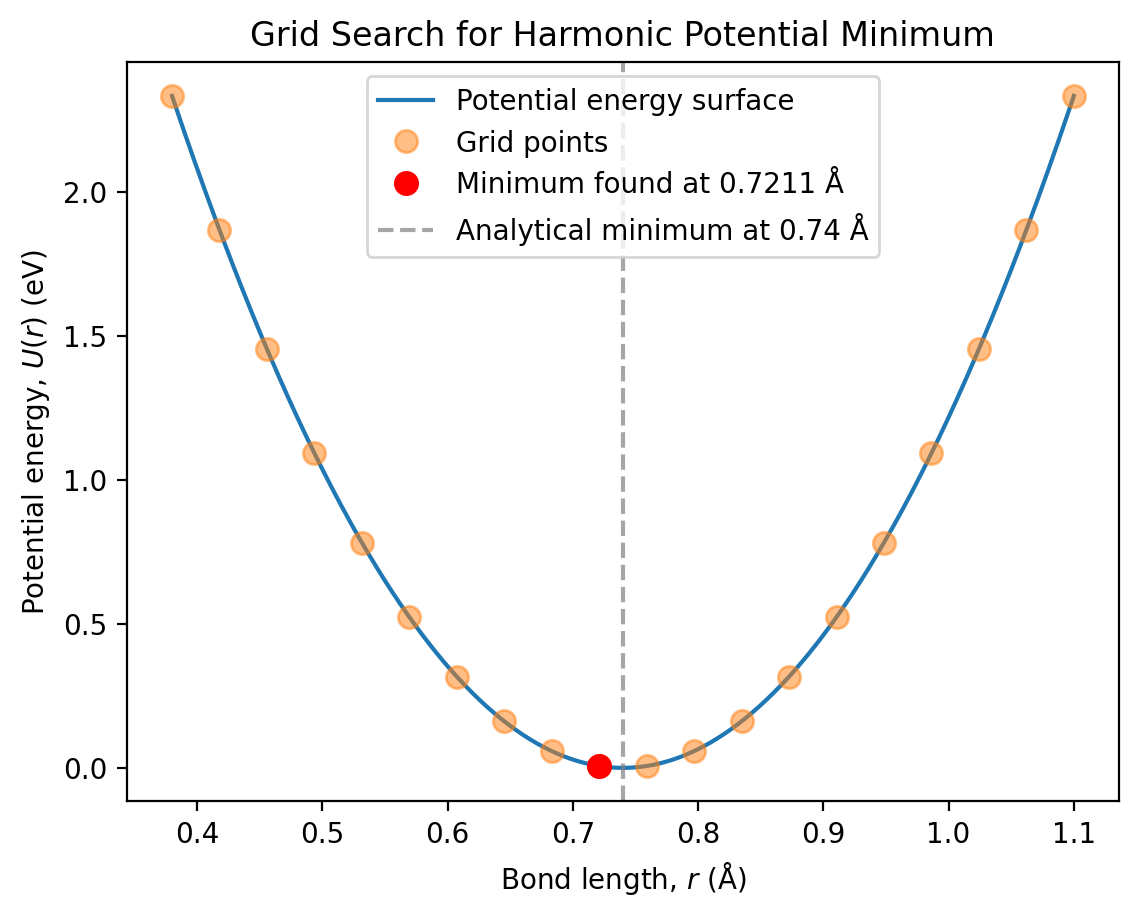

In [17]:
# Create a fine grid for smooth plotting
r_fine = np.linspace(0.38, 1.1, 500)
U_fine = harmonic_potential(r_fine, k, r_0)

# Plot
plt.plot(r_fine, U_fine, '-', label='Potential energy surface')
plt.plot(r_grid, U_grid, 'o', markersize=8, alpha=0.5, label='Grid points')
plt.plot(r_min, U_min, 'ro', markersize=8, label=f'Minimum found at {r_min:.4f} Å')
plt.axvline(r_0, color='grey', linestyle='--', alpha=0.7, 
            label=f'Analytical minimum at {r_0} Å')
plt.xlabel('Bond length, $r$ (Å)')
plt.ylabel('Potential energy, $U(r)$ (eV)')
plt.title('Grid Search for Harmonic Potential Minimum')
plt.legend()
plt.show()

### Investigating grid density

How does the accuracy depend on the number of grid points? Let's compare different grid densities:

In [18]:
# Test different numbers of grid points
grid_sizes = [10, 20, 50, 100, 200, 500]

print("Effect of grid density on accuracy:\n")
print("Grid points | r_min (Å) | Error (Å)")
print("-" * 40)

for n_points in grid_sizes:
    r_grid_test = np.linspace(0.38, 1.1, n_points)
    U_grid_test = harmonic_potential(r_grid_test, k, r_0)
    min_idx = np.argmin(U_grid_test)
    r_min_test = r_grid_test[min_idx]
    error = abs(r_min_test - r_0)
    print(f"{n_points:11d} | {r_min_test:9.6f} | {error:.6f}")

Effect of grid density on accuracy:

Grid points | r_min (Å) | Error (Å)
----------------------------------------
         10 |  0.700000 | 0.040000
         20 |  0.721053 | 0.018947
         50 |  0.732653 | 0.007347
        100 |  0.736364 | 0.003636
        200 |  0.738191 | 0.001809
        500 |  0.739279 | 0.000721


**Observations:**

1. **Accuracy improves with grid density**: More grid points give better approximations to the true minimum. The error decreases roughly linearly with the grid spacing.

2. **Computational cost scales linearly**: Doubling the number of grid points doubles the number of function evaluations required.

3. **Diminishing returns**: Beyond a certain point, adding more grid points provides minimal improvement. For this simple 1D problem, 100-200 points gives reasonable accuracy.

**Limitations of grid search:**

While conceptually simple, grid search has serious practical limitations:

- **Curse of dimensionality**: For a molecule with $N$ atoms in 3D, we have $3N$ coordinates. A grid with just 10 points per dimension would require $10^{3N}$ function evaluations! For a small molecule with 10 atoms (30 coordinates), this is $10^{30}$ evaluations—completely impractical.

- **No information about the surface**: Grid search tells us nothing about the shape or curvature of the potential energy surface, unlike gradient-based methods.

- **Arbitrary accuracy limit**: We can't get better accuracy than our grid spacing without increasing the number of points.

For these reasons, more sophisticated methods (like gradient descent and Newton-Raphson) are essential for real molecular systems. However, grid search remains useful for:
- Visualizing 1D or 2D potential energy surfaces
- Finding rough initial guesses for other optimisation methods
- Problems with discontinuous or poorly behaved functions